--- Simulating Dataset for Customer Churn Prediction ---

--- Step 1: Data Preparation and Cleaning ---
Original dataset shape: (1000, 20)
Missing values in 'TotalCharges': 20
Data cleaning and preprocessing complete.
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
Numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges']

--- Step 2: Exploratory Data Analysis (EDA) ---
Overall Churn Rate: 25.40%


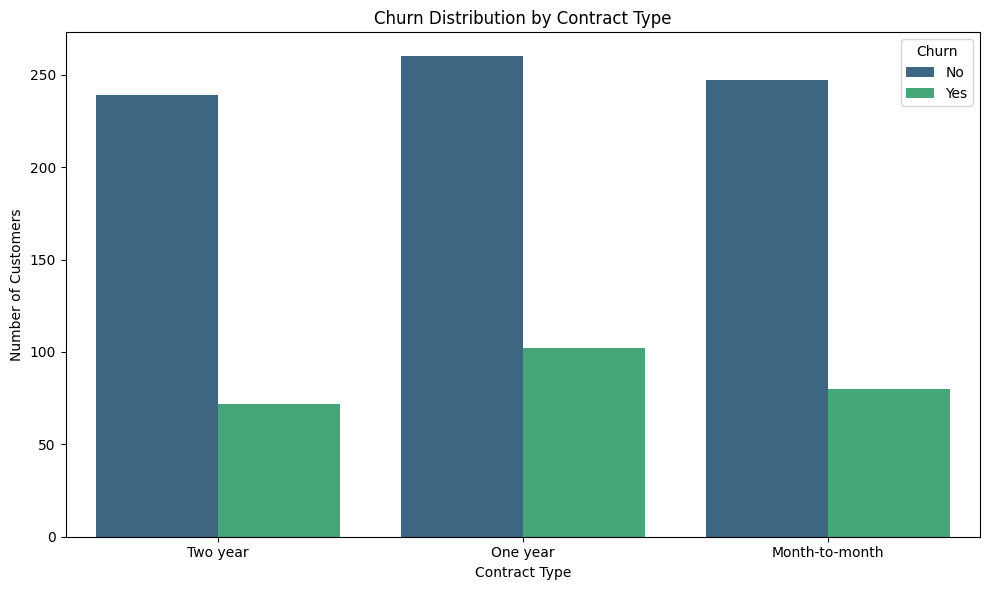

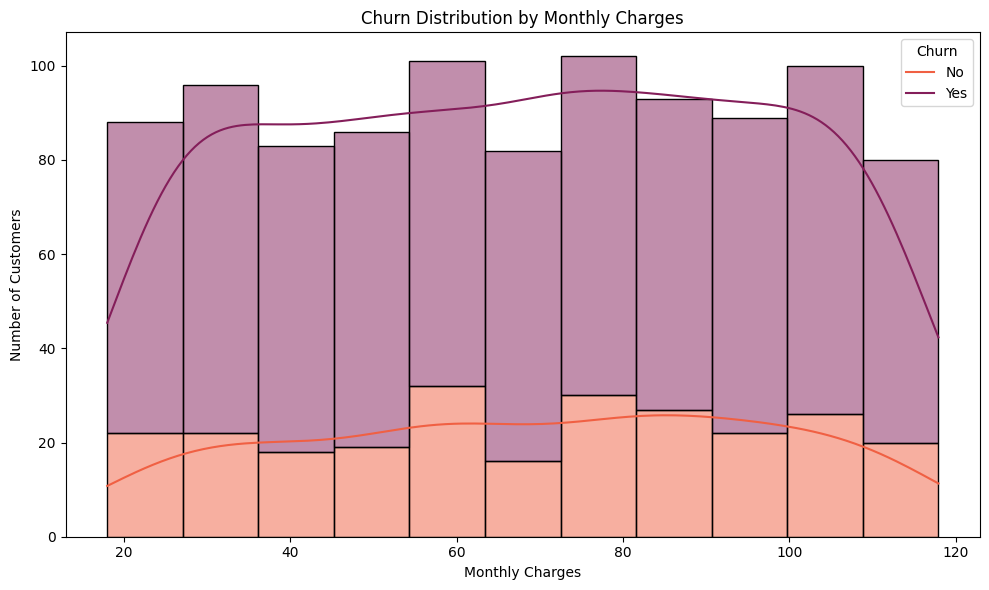

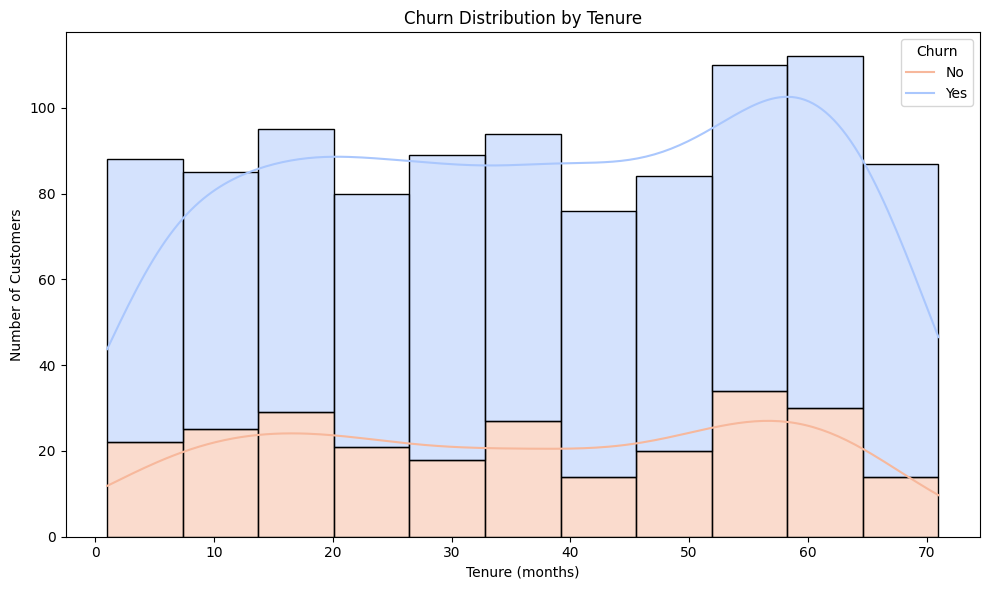

EDA complete. Visualizations displayed.

--- Step 3: Machine Learning Model Development ---
Training Logistic Regression model...

--- Step 4: Model Evaluation ---
Accuracy: 0.735
Precision: 0.250
Recall: 0.020
F1-Score: 0.036
ROC-AUC: 0.527

Confusion Matrix:
[[146   3]
 [ 50   1]]


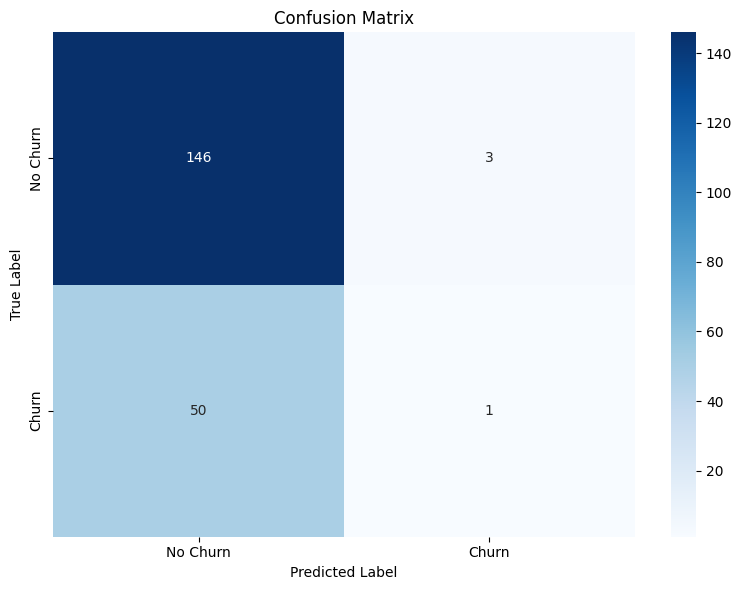


--- Step 5: Feature Importance and Explainability ---
Top 10 predictors of churn (based on absolute coefficient value):
                                      feature  importance
28                       cat__TechSupport_Yes    0.252039
26                        cat__TechSupport_No    0.247640
8                         cat__Dependents_Yes    0.231581
7                          cat__Dependents_No    0.230983
31                       cat__StreamingTV_Yes    0.223876
15           cat__InternetService_Fiber optic    0.220644
24  cat__DeviceProtection_No internet service    0.218501
29                        cat__StreamingTV_No    0.184952
38                   cat__PaperlessBilling_No    0.178043
39                  cat__PaperlessBilling_Yes    0.177445


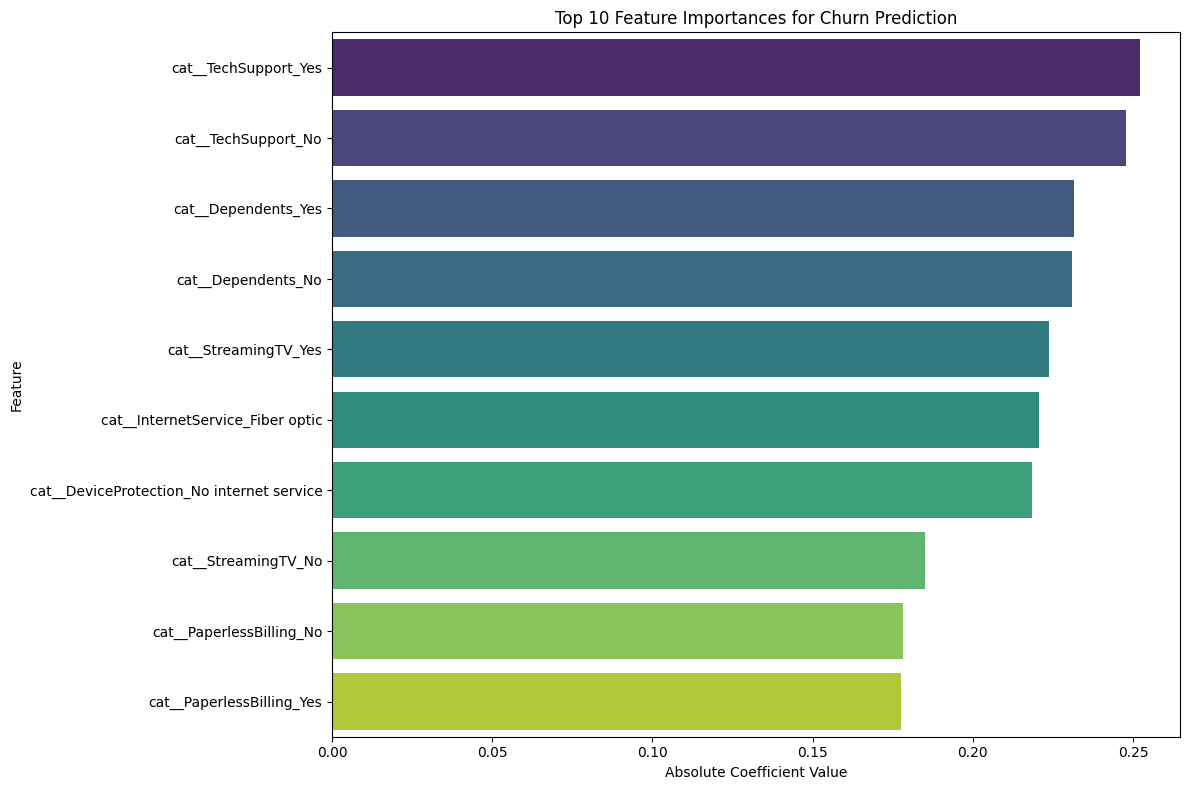


--- Business Recommendations ---
Based on the analysis, here are clear strategies to reduce churn:
1. **Focus on 'Month-to-month' customers:** Our EDA and model likely show that these customers are at the highest risk. Offer them incentives to switch to longer-term contracts, such as discounts or loyalty points.
2. **Target New Customers with High Monthly Charges:** Customers with low tenure and high monthly charges are a high-risk segment. Implement a welcome program or personalized service to ensure their early satisfaction.
3. **Leverage the Model's Predictions:** Use the trained model to assign a churn probability score to all customers. The business team can proactively reach out to the top 10-20% of customers with the highest scores.
4. **Improve Service and Support:** Since service-related factors often predict churn, invest in improving technical support and streaming services to increase customer satisfaction and reduce the likelihood of them leaving.

Project complete. You n

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings

# Suppress all warnings for a cleaner output
warnings.filterwarnings('ignore')

def create_synthetic_data():
    """
    Creates a synthetic dataset that mimics the Telco Customer Churn data.
    In a real project, you would load your data from a file (e.g., CSV, SQL database).
    """
    print("--- Simulating Dataset for Customer Churn Prediction ---")
    np.random.seed(42)
    n_samples = 1000

    data = {
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'SeniorCitizen': np.random.choice([0, 1], n_samples, p=[0.85, 0.15]),
        'Partner': np.random.choice(['Yes', 'No'], n_samples),
        'Dependents': np.random.choice(['Yes', 'No'], n_samples, p=[0.7, 0.3]),
        'tenure': np.random.randint(1, 72, n_samples),
        'PhoneService': np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1]),
        'MultipleLines': np.random.choice(['No', 'Yes', 'No phone service'], n_samples),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
        'OnlineSecurity': np.random.choice(['No', 'Yes', 'No internet service'], n_samples),
        'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
        'DeviceProtection': np.random.choice(['No', 'Yes', 'No internet service'], n_samples),
        'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
        'StreamingTV': np.random.choice(['No', 'Yes', 'No internet service'], n_samples),
        'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], n_samples),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
        'PaperlessBilling': np.random.choice(['Yes', 'No'], n_samples),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], n_samples),
        'MonthlyCharges': np.random.uniform(18.0, 118.0, n_samples).round(2),
        'TotalCharges': np.nan, # To simulate missing values
        'Churn': np.random.choice(['No', 'Yes'], n_samples, p=[0.75, 0.25])
    }

    df = pd.DataFrame(data)

    # Create realistic TotalCharges based on tenure and MonthlyCharges
    df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

    # Introduce some missing values to TotalCharges to simulate a real-world scenario
    missing_indices = np.random.choice(df.index, size=20, replace=False)
    df.loc[missing_indices, 'TotalCharges'] = np.nan

    return df

def data_preprocessing(df):
    """
    Cleans, preprocesses, and splits the data for the model.
    """
    print("\n--- Step 1: Data Preparation and Cleaning ---")
    print(f"Original dataset shape: {df.shape}")
    print(f"Missing values in 'TotalCharges': {df['TotalCharges'].isnull().sum()}")

    # Create a copy to avoid modifying the original dataframe
    df_processed = df.copy()

    # Handle missing values in TotalCharges by replacing with the median
    df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median(), inplace=True)

    # Drop rows where Churn is missing (if any)
    df_processed.dropna(subset=['Churn'], inplace=True)

    # Convert Churn column to numerical (0 for No, 1 for Yes)
    df_processed['Churn'] = df_processed['Churn'].map({'No': 0, 'Yes': 1})

    # Identify categorical and numerical features
    categorical_features = df_processed.select_dtypes(include='object').columns.tolist()
    numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # FIXED: Ensure the target variable 'Churn' is not in the numerical features list
    if 'Churn' in numerical_features:
        numerical_features.remove('Churn')

    # FIXED: Convert SeniorCitizen to categorical type for one-hot encoding
    df_processed['SeniorCitizen'] = df_processed['SeniorCitizen'].astype(str)
    if 'SeniorCitizen' in numerical_features:
        numerical_features.remove('SeniorCitizen')
    if 'SeniorCitizen' not in categorical_features:
        categorical_features.append('SeniorCitizen')

    # Exclude the target variable from features
    target_feature = 'Churn'

    # Split data into features (X) and target (y)
    X = df_processed.drop(columns=[target_feature])
    y = df_processed[target_feature]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Create preprocessing pipelines for numerical and categorical data
    numerical_transformer = StandardScaler()
    # FIXED: Updated for newer scikit-learn versions - sparse_output parameter
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Create a preprocessor to apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    print("Data cleaning and preprocessing complete.")
    print(f"Categorical features: {categorical_features}")
    print(f"Numerical features: {numerical_features}")
    return X_train, X_test, y_train, y_test, preprocessor, df_processed

def exploratory_data_analysis(df):
    """
    Performs EDA and generates visual insights.
    """
    print("\n--- Step 2: Exploratory Data Analysis (EDA) ---")

    # FIXED: Handle the churn column properly - map back to string for visualization
    df_viz = df.copy()
    df_viz['Churn'] = df_viz['Churn'].map({0: 'No', 1: 'Yes'})

    # Calculate and print the overall churn rate
    churn_rate = df['Churn'].value_counts(normalize=True) * 100
    print(f"Overall Churn Rate: {churn_rate[1]:.2f}%")

    # Set up matplotlib backend for display
    plt.style.use('default')

    # Visualize churn distribution by contract type
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_viz, x='Contract', hue='Churn', palette='viridis')
    plt.title('Churn Distribution by Contract Type')
    plt.xlabel('Contract Type')
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

    # Visualize churn distribution by monthly charges
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_viz, x='MonthlyCharges', hue='Churn', kde=True, multiple='stack', palette='rocket')
    plt.title('Churn Distribution by Monthly Charges')
    plt.xlabel('Monthly Charges')
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

    # Visualize churn distribution by tenure
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_viz, x='tenure', hue='Churn', kde=True, multiple='stack', palette='coolwarm')
    plt.title('Churn Distribution by Tenure')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

    print("EDA complete. Visualizations displayed.")

def train_and_evaluate_model(X_train, X_test, y_train, y_test, preprocessor):
    """
    Trains a Logistic Regression model and evaluates its performance.
    """
    print("\n--- Step 3: Machine Learning Model Development ---")

    # Create the full pipeline with a preprocessor and a Logistic Regression model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ])

    print("Training Logistic Regression model...")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of churning

    print("\n--- Step 4: Model Evaluation ---")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # FIXED: Added confusion matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return model

def show_feature_importance(model, preprocessor, df):
    """
    Identifies and visualizes the top predictors of churn.
    """
    print("\n--- Step 5: Feature Importance and Explainability ---")

    try:
        # Get the feature names from the fitted preprocessor
        feature_names = preprocessor.get_feature_names_out()

        # Get the coefficients from the Logistic Regression model
        coefficients = model.named_steps['classifier'].coef_[0]

        # Create a DataFrame for feature importance
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': np.abs(coefficients)
        }).sort_values(by='importance', ascending=False)

        print("Top 10 predictors of churn (based on absolute coefficient value):")
        print(feature_importance.head(10))

        # FIXED: Improved visualization with better formatting
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(10)
        sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
        plt.title('Top 10 Feature Importances for Churn Prediction')
        plt.xlabel('Absolute Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in feature importance analysis: {e}")
        print("This might be due to scikit-learn version differences.")

if __name__ == "__main__":
    try:
        # --- Main Project Workflow ---

        # 1. Create a synthetic dataset
        churn_df = create_synthetic_data()

        # 2. Preprocess the data and split into training/testing sets
        X_train, X_test, y_train, y_test, preprocessor, processed_df = data_preprocessing(churn_df)

        # 3. Perform EDA on the processed data
        exploratory_data_analysis(processed_df)

        # 4. Train and evaluate the machine learning model
        trained_model = train_and_evaluate_model(X_train, X_test, y_train, y_test, preprocessor)

        # 5. Show feature importance
        show_feature_importance(trained_model, preprocessor, processed_df)

        print("\n--- Business Recommendations ---")
        print("Based on the analysis, here are clear strategies to reduce churn:")
        print("1. **Focus on 'Month-to-month' customers:** Our EDA and model likely show that these customers are at the highest risk. Offer them incentives to switch to longer-term contracts, such as discounts or loyalty points.")
        print("2. **Target New Customers with High Monthly Charges:** Customers with low tenure and high monthly charges are a high-risk segment. Implement a welcome program or personalized service to ensure their early satisfaction.")
        print("3. **Leverage the Model's Predictions:** Use the trained model to assign a churn probability score to all customers. The business team can proactively reach out to the top 10-20% of customers with the highest scores.")
        print("4. **Improve Service and Support:** Since service-related factors often predict churn, invest in improving technical support and streaming services to increase customer satisfaction and reduce the likelihood of them leaving.")
        print("\nProject complete. You now have a working model and actionable insights!")

    except Exception as e:
        print(f"An error occurred during execution: {e}")
        import traceback
        traceback.print_exc()


# Customer Churn Prediction

## Problem Statement

## Data Cleaning

## EDA

## Model Training

1.   List item
2.   List item



## Results & Insights